# Symmtric v.s. Asymmtric
<br />
<font size=3>
示範兩種量化方式，分別為對稱量化(symmtric)與非對稱量化(asymmtric)，此篇用8-bit量化舉例。<br />
symmtric在8-bit量化後的數據範圍為-128~127，asymmtric則是0~255
<font>

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# 產生-1~10且間格0.2的數據
x = np.arange(-1, 10, 0.2, dtype=float)
# 量化bit數為8
bit = 8

## Symmtric<br />
<font size=3>此範例將數據量化到8-bit的資料型態，對稱(symmetric)量化的方式為:<br /><br />
1. 觀察資料範圍
$$ range_{x} = max(|{x}|) $$
2. 計算scale
$$ \alpha _x = \frac {2^{n-1}-1}{max(|{x}|)} \quad $$
3. 量化$x$
$$ x_q = round(x \times \alpha _x) $$
</font>

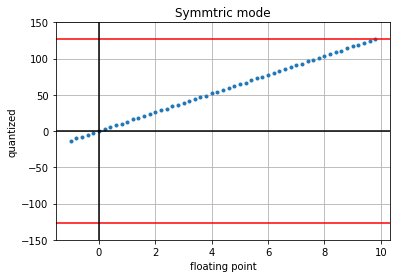

In [9]:
# 觀察數據範圍
max_abs_x = np.max(np.abs(x))
# 計算Scale
scale = (2**(bit - 1) - 1) / max_abs_x
# 量化
xq = np.round(x * scale, 0)

# 畫圖
fig, ax = plt.subplots()
ax.plot(x.reshape(-1), xq.reshape(-1),'o', marker='.')
ax.axhline(y=127, xmin=0, xmax=10, color='r')
ax.axhline(y=-127, xmin=0, xmax=10, color='r')
ax.set_xlabel("floating point")
ax.set_ylabel("quantized")
ax.set_title("Symmtric mode")
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.set_ylim([-150, 150])
ax.grid(True)
plt.show()

## Asymmtric<br />
<font size=3>
此範例將數據量化到8-bit的資料型態，非對稱(asymmetric)量化的方式為:<br /><br />
1. 觀察資料範圍
$$ range_{x} = max(x) - min(x) $$
2. 計算scale
$$ \alpha _x = \frac {2^{n-1}-1}{max(x) - min(x)} \quad $$
3. 計算ZeroPoint
$$ zp_x = round(min(x) \times \alpha _x) $$
4. 量化$x$
$$ x_q = round(x \times \alpha _x) - zp_x $$
</font>

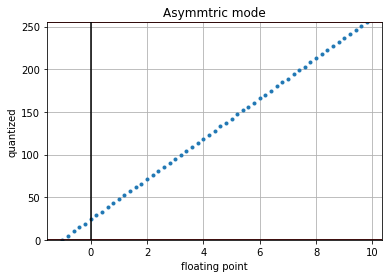

In [10]:
# 觀察數據範圍
max_x = np.max(x)
min_x = np.min(x)
# 計算Scale
scale = (2**(bit) - 1) / (max_x - min_x)
# 計算zero-point
zp = np.round(min_x * scale, 0)
# 量化
xq = np.round(x * scale, 0) - zp

# 畫圖
fig, ax = plt.subplots()
ax.plot(x.reshape(-1), xq.reshape(-1),'o', marker='.')
ax.axhline(y=0, xmin=0, xmax=10, color='r')
ax.axhline(y=255, xmin=0, xmax=10, color='r')
ax.set_xlabel("floating point")
ax.set_ylabel("quantized")
ax.set_title("Asymmtric mode")
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.set_ylim([0, 255])
ax.grid(True)
plt.show()
